<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-2-Applied-Modeling/blob/master/Fatal_Police_Shootings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installations

In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:

    # Install required python packages
    !pip install -r 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/requirements.txt'

     |████████████████████████████████| 92kB 5.5MB/s 
     |████████████████████████████████| 112kB 14.7MB/s 
     |████████████████████████████████| 133kB 41.1MB/s 
     |████████████████████████████████| 57.7MB 1.1MB/s 
     |████████████████████████████████| 245kB 34.7MB/s 
     |████████████████████████████████| 614kB 24.3MB/s 
     |████████████████████████████████| 235kB 42.6MB/s 
     |████████████████████████████████| 307kB 35.5MB/s 
     |████████████████████████████████| 215kB 42.0MB/s 
     |████████████████████████████████| 51kB 20.1MB/s 
     |████████████████████████████████| 51kB 19.2MB/s 
     |████████████████████████████████| 737kB 39.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=29c13b2b980bc323214f465f891d5cbff1b71e23b6222cdefdf707ba695603c9
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for pdpbox: filename=PDPbox-0.2.0-

### Pre-processing

In [34]:
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# link from vice github
link = 'https://raw.githubusercontent.com/vicenews/shot-by-cops/master/subject_data.csv'

# read in 
df = pd.read_csv(link)

# check df shape
df.shape

(4400, 16)

In [35]:
# first look at df
df.head()

,Date,NumberOfSubjects,Fatal,SubjectArmed,SubjectRace,SubjectGender,SubjectAge,NatureOfStop,NumberOfShots,NumberOfOfficers,OfficerRace,OfficerGender,Department,FullNarrative,City,Notes
0,3/4/2010,1,N,N,L,U,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,motorized vehicle; no hits
1,1/9/2010,1,F,Y,W,M,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,NaN
2,6/10/2010,1,F,Y,W,M,U,NaN,NaN,2,W;W,M;M,Albuquerque Police Department,NaN,Albuquerque,NaN
3,11/10/2010,1,N,Y,U,M,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,NaN
4,11/11/2010,1,N,Y,L,M,U,NaN,NaN,1,W,M,Albuquerque Police Department,NaN,Albuquerque,NaN


In [0]:
# target category is 'Fatal'
target = 'Fatal'

In [37]:
# lets see how balanced our class is
print(df[target].value_counts())
df[target].value_counts(normalize=True)

N     2719
F     1379
U      288
 N      11
 F       3
Name: Fatal, dtype: int64


N     0.617955
F     0.313409
U     0.065455
 N    0.002500
 F    0.000682
Name: Fatal, dtype: float64

It looks like I will need to clean these up. However there are likely 3 classes<br/>
N - non-fatal<br/>
F - Fatal<br/>
U - Unknown<br/>

In [38]:
# remove space
df['Fatal'] = df[target].str.strip()

# repeat step to check work
print(df[target].value_counts())
df[target].value_counts(normalize=True)

N    2730
F    1382
U     288
Name: Fatal, dtype: int64


N    0.620455
F    0.314091
U    0.065455
Name: Fatal, dtype: float64

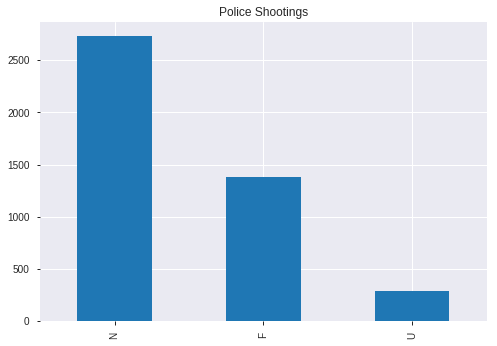

In [39]:
# visualize
df[target].value_counts().plot(kind='bar')
plt.title('Police Shootings')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

# do a train test split
train, test = train_test_split(df, test_size=.2, random_state=11)

train.shape, test.shape

((3520, 16), (880, 16))

In [41]:
# split again for validation
train, val = train_test_split(train, test_size=.2, random_state=11)

train.shape, val.shape

((2816, 16), (704, 16))

In [42]:
# divide into X features matrix and y target vector
X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
X_test = test.drop(columns=target)

# y target vector
y_train = train[target]
y_val = val[target]
y_test = test[target]

# verify shape
X_train.shape, y_train.shape

((2816, 15), (2816,))

In [46]:
from sklearn.impute import SimpleImputer

# create quick baseline model
base_RF = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1, random_state=11)
)
# Fit on train, score on val
base_RF.fit(X_train, y_train)
y_pred = base_RF.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation Accuracy 0.6505681818181818
